In [3]:
pip install opendatasets


In [4]:
import opendatasets as od
data =od.download("https://www.kaggle.com/datasets/techsash/waste-classification-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: devanshudeshmukh1
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data


100%|██████████| 427M/427M [00:00<00:00, 461MB/s]


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
from click.core import batch
train_ds=keras.utils.image_dataset_from_directory(
    directory= '/content/waste-classification-data/DATASET/TRAIN',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test_ds=keras.utils.image_dataset_from_directory(
    directory= '/content/waste-classification-data/DATASET/TEST',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [8]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)
#

In [9]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
#CNN
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))



model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout


num_classes = 11

model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))


model.add(Dense(num_classes, activation='softmax'))


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,843 (56.64 MB)

 Trainable params: 14,848,395 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [13]:
history =model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 76s 90ms/step - accuracy: 0.7154 - loss: 2.8360 - val_accuracy: 0.7043 - val_loss: 0.7192
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.8095 - loss: 0.4504 - val_accuracy: 0.8870 - val_loss: 0.3204
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.8343 - loss: 0.3988 - val_accuracy: 0.8922 - val_loss: 0.2913
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.8520 - loss: 0.3579 - val_accuracy: 0.8782 - val_loss: 0.2962
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 57s 81ms/step - accuracy: 0.8569 - loss: 0.3475 - val_accuracy: 0.8647 - val_loss: 0.3284
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 56s 80ms/step - accuracy: 0.8538 - loss: 0.3568 - val_accuracy: 0.8846 - val_loss: 0.2789
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 57s 80ms/step - accuracy: 0.8732 - loss: 0.3169 - val_accuracy: 0.8838 - val_loss: 0.3251
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - accuracy: 0.8954 - loss: 0.2580 - 

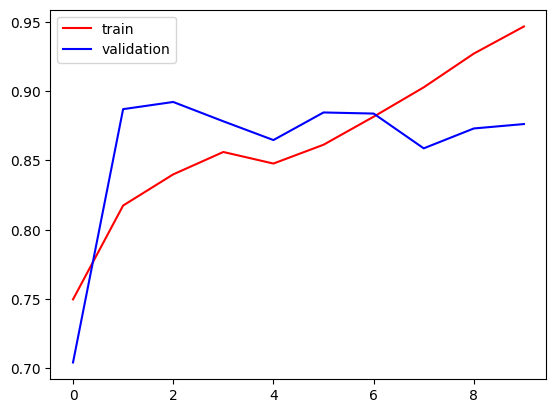

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

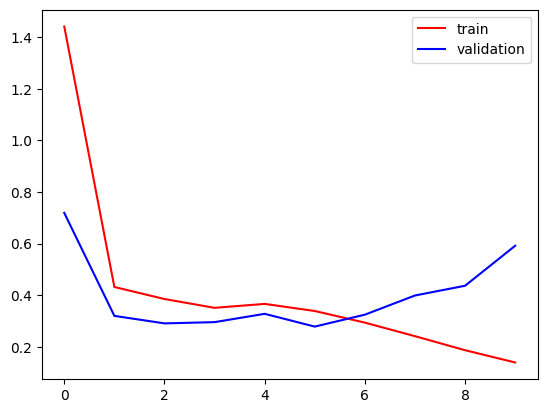

In [15]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [16]:
import cv2

In [17]:
test_img=cv2.imread('/content/waste-classification-data/DATASET/TEST/O/O_12568.jpg')

array([[[ 32,  56,  32],
        [ 23,  52,  27],
        [ 29,  64,  38],
        ...,
        [ 93, 142, 134],
        [ 94, 138, 131],
        [ 95, 135, 130]],

       [[  6,  30,   6],
        [  9,  38,  13],
        [  0,  27,   1],
        ...,
        [ 99, 148, 140],
        [101, 145, 138],
        [103, 140, 136]],

       [[ 29,  55,  31],
        [ 34,  64,  39],
        [ 14,  51,  25],
        ...,
        [105, 152, 144],
        [106, 148, 141],
        [108, 143, 139]],

       ...,

       [[ 93, 145, 222],
        [ 74, 124, 200],
        [ 61, 110, 180],
        ...,
        [111, 114, 128],
        [118, 121, 135],
        [123, 129, 142]],

       [[ 87, 135, 207],
        [ 76, 121, 189],
        [ 71, 109, 174],
        ...,
        [113, 116, 131],
        [119, 122, 137],
        [124, 126, 144]],

       [[ 73, 121, 193],
        [ 72, 117, 185],
        [ 73, 111, 176],
        ...,
        [115, 118, 133],
        [119, 122, 137],
        [124, 126, 144]]], dtype=uint8)
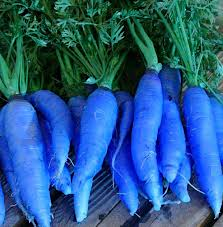

In [18]:
test_img

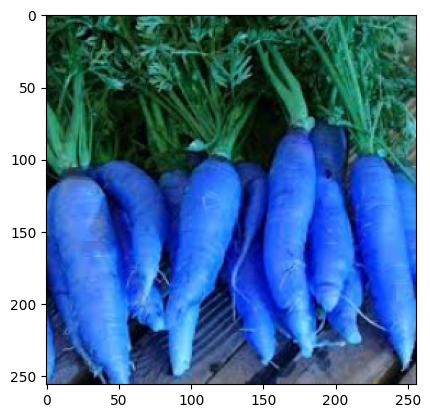

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(256, 256, 3)

In [22]:
test_img=cv2.resize(test_img,(256,256))

In [23]:
test_img.shape

(256, 256, 3)

In [24]:
model.predict(test_img.reshape(1,256,256,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


array([[1.]], dtype=float32)